In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = '../Data/dataset_coursework.dta'
df = pd.read_stata(file_path)

df.head()

,date,r_market,rfr,hml,smb,PG,PGR,PEG,PSA,PHM,...,PH,PAYX,PNR,PEP,PFE,PCG,PNW,PNC,PPG,PPL
0,1990-01-02,1.466,0.026,-0.07,-0.68,3.742180,0.558444,2.634402,2.293497,1.127370,...,4.108253,0.350331,1.636816,4.562752,0.963962,7.056986,3.085677,6.319519,4.171158,1.694110
1,1990-01-03,-0.034,0.026,-0.26,0.73,3.735541,0.562070,2.567990,2.319558,1.139114,...,4.146826,0.359313,1.636816,4.518369,0.967357,7.056986,3.219837,6.469095,4.287382,1.699033
2,1990-01-04,-0.684,0.026,-0.22,0.42,3.662558,0.558444,2.523715,2.319558,1.115627,...,4.262552,0.359313,1.636816,4.473984,0.982631,6.975873,3.152757,6.581278,4.248638,1.684260
3,1990-01-05,-0.824,0.026,-0.21,0.77,3.596207,0.560257,2.457299,2.293497,1.068653,...,4.204689,0.359313,1.636816,4.411844,0.974145,6.813641,3.186297,6.525184,4.196984,1.669486
4,1990-01-08,0.326,0.026,-0.26,-0.41,3.662558,0.562070,2.479439,2.371683,1.033423,...,4.204689,0.354822,1.622457,4.491737,0.965660,6.854197,3.219837,6.506493,4.261551,1.649787


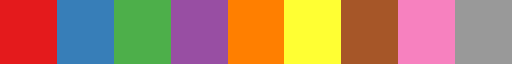

In [3]:
# 配色方案
color_map = plt.get_cmap('Set1')
color_map_alpha = plt.get_cmap('Pastel1')
plt.rc('font', family='Arial')  # or 'sans-serif' 根据需要选

color_map

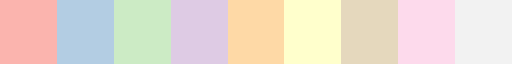

In [4]:
color_map_alpha

In [5]:
# 获取系统中所有可用的字体
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

valid_font_names = []

for font in font_list:
    try:
        prop = fm.FontProperties(fname=font)
        font_name = prop.get_name()
        valid_font_names.append(font_name)
    except RuntimeError:
        continue


unique_valid_font_names = sorted(set(valid_font_names))

for font_name in unique_valid_font_names:
    print(font_name)

.Aqua Kana
.CJK Symbols Fallback HK
.Keyboard
.LastResort
.New York
.SF Arabic
.SF Arabic Rounded
.SF Armenian
.SF Armenian Rounded
.SF Camera
.SF Compact
.SF Compact Rounded
.SF Georgian
.SF Georgian Rounded
.SF Hebrew
.SF Hebrew Rounded
.SF NS Mono
.SF NS Rounded
.SF Soft Numeric
.ThonburiUI
Academy Engraved LET
Adelle Sans Devanagari
AkayaKanadaka
AkayaTelivigala
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Annai MN
Apple Braille
Apple Chancery
Apple LiGothic
Apple LiSung
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Arima Koshi
Arima Madurai
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
BIZ UDGothic
BIZ UDMincho
BM Dohyeon
BM Hanna 11yrs Old
BM Hanna Air
BM Hanna Pro
BM Jua
BM Kirang Haerang
BM Yeonsung
Baghdad
Bai Jamjuree
Baloo 2
Baloo Bhai 2
Baloo Bhaijaan
Baloo Bhaina 2
Baloo Chettan 2
Baloo Da 2
Baloo Paaji 2
Baloo Tamma 2
Baloo Tammudu 2
Baloo Thambi 2
Ban

In [ ]:
fira_fonts = [font for font in font_list if 'Arial' in font]

# 打印出找到的字体路径
for font_path in fira_fonts:
    print(f"Found font: {font_path}")

Found font: /System/Library/Fonts/ArialHB.ttc
Found font: /System/Library/Fonts/Supplemental/Arial Narrow Italic.ttf
Found font: /System/Library/Fonts/Supplemental/Arial Narrow.ttf
Found font: /System/Library/Fonts/Supplemental/Arial Black.ttf
Found font: /System/Library/Fonts/Supplemental/Arial Italic.ttf
Found font: /System/Library/Fonts/Supplemental/Arial.ttf
Found font: /System/Library/Fonts/Supplemental/Arial Rounded Bold.ttf
Found font: /System/Library/Fonts/Supplemental/Arial Narrow Bold Italic.ttf
Found font: /System/Library/Fonts/Supplemental/Arial Unicode.ttf
Found font: /Library/Fonts/Arial Unicode.ttf
Found font: /System/Library/Fonts/Supplemental/Arial Bold Italic.ttf
Found font: /System/Library/Fonts/Supplemental/Arial Bold.ttf
Found font: /System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf


In [6]:
# 绘图标准用Arial字体，标题用regular_font，其他用italics_font
# size全部为12
# pad为12
# figsize为7,5
regular_font = fm.FontProperties(fname='/System/Library/Fonts/Supplemental/Arial.ttf', size=12)
legend_font = fm.FontProperties(fname='/System/Library/Fonts/Supplemental/Arial.ttf', size=10)
bold_font = fm.FontProperties(fname='/System/Library/Fonts/Supplemental/Arial Bold.ttf', size=12)
italics_font = fm.FontProperties(fname='/System/Library/Fonts/Supplemental/Arial Italic.ttf', size=12)

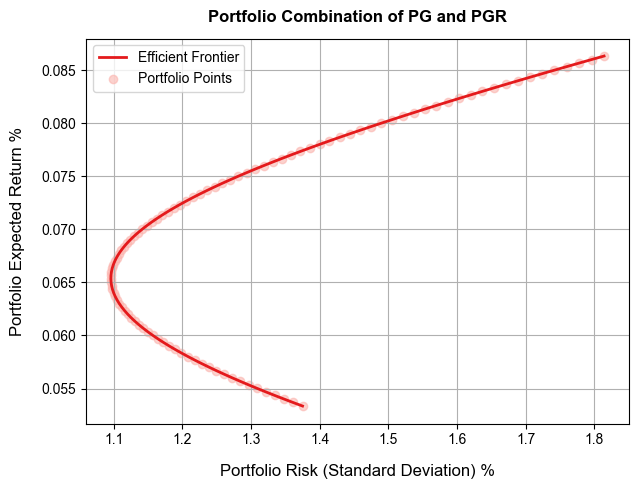

In [7]:
# 绘制两个资产的有效前沿

returns = df.copy()
returns = returns.iloc[:, 5:]
returns = returns.pct_change()
returns = returns.dropna() # 去除缺失值以便计算协方差
# returns.head()

# 计算期望回报与方差
E_R_PG = np.mean(returns['PG']) * 100  # 期望回报
E_R_PGR = np.mean(returns['PGR']) * 100
std_dev_PG = np.std(returns['PG']) * 100
std_dev_PGR = np.std(returns['PGR']) * 100

# 计算两者之间的协方差
cov_PG_PGR = np.cov(returns['PG'], returns['PGR'])[0][1]

# 定义权重
weights_PG = np.linspace(0, 1, 100)

portfolio_returns = []
portfolio_risks = []

# 计算不同权重下的组合回报与风险
for w_PG in weights_PG:
    w_PGR = 1 - w_PG
    # 组合回报
    portfolio_return = w_PG * E_R_PG + w_PGR * E_R_PGR
    # 组合风险
    portfolio_risk = np.sqrt((w_PG * std_dev_PG)**2 + (w_PGR * std_dev_PGR)**2 + 2 * w_PG * w_PGR * cov_PG_PGR)
    portfolio_returns.append(portfolio_return)
    portfolio_risks.append(portfolio_risk)

# 画出有效前沿
plt.figure(figsize=(7, 5))
plt.plot(portfolio_risks, portfolio_returns, color = color_map(0), label='Efficient Frontier', lw=2)
plt.scatter(portfolio_risks, portfolio_returns, color=color_map_alpha(0), alpha=0.6, label='Portfolio Points')
plt.title('Portfolio Combination of PG and PGR', pad=12, fontproperties=bold_font)
plt.xlabel('Portfolio Risk (Standard Deviation) %', labelpad=12, fontproperties=regular_font)
plt.ylabel('Portfolio Expected Return %', labelpad=12, fontproperties=regular_font)
plt.legend(loc='best', prop=legend_font)
plt.grid(True)
plt.show()

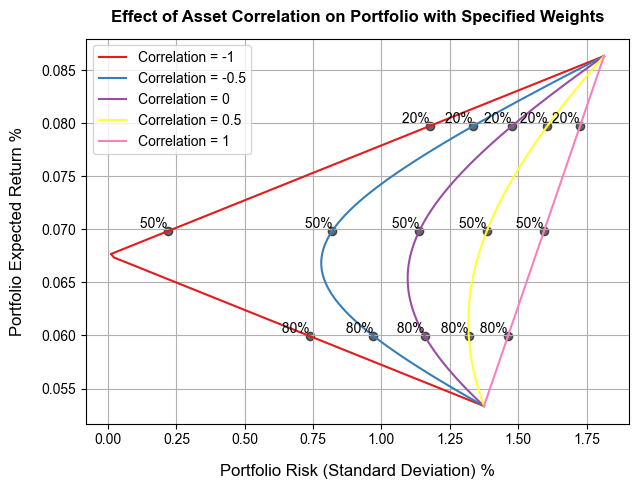

In [8]:
# 绘制不同相关性下的有效前沿

# 期望日回报率和标准差
E_R_PG = np.mean(returns['PG']) * 100  # 期望回报
E_R_PGR = np.mean(returns['PGR']) * 100
std_dev_PG = np.std(returns['PG']) * 100
std_dev_PGR = np.std(returns['PGR']) * 100

# 模拟不同的相关性ρ值
correlations = [-1, -0.5, 0, 0.5, 1]

# 指定的权重
specified_weights = [0.8, 0.5, 0.2]

# 计算投资组合风险和收益
def calculate_portfolio(E_R_PG, E_R_PGR, std_dev_PG, std_dev_PGR, rho, w_PG):
    w_PGR = 1 - w_PG
    portfolio_return = w_PG * E_R_PG + w_PGR * E_R_PGR
    cov_PG_PGR = rho * std_dev_PG * std_dev_PGR
    portfolio_risk = np.sqrt((w_PG * std_dev_PG)**2 + (w_PGR * std_dev_PGR)**2 + 2 * w_PG * w_PGR * cov_PG_PGR)
    return portfolio_risk, portfolio_return

# 绘图
plt.figure(figsize=(7, 5))
for idx, rho in enumerate(correlations):
    portfolio_risks = []
    portfolio_returns = []
    for w in np.linspace(0, 1, 100):
        risk, return_ = calculate_portfolio(E_R_PG, E_R_PGR, std_dev_PG, std_dev_PGR, rho, w)
        portfolio_risks.append(risk)
        portfolio_returns.append(return_)
    
    color = color_map(idx / len(correlations))
    plt.plot(portfolio_risks, portfolio_returns, label=f'Correlation = {rho}', color=color)
    
    # 计算并标注指定权重的点
    for w_PG in specified_weights:
        risk, return_ = calculate_portfolio(E_R_PG, E_R_PGR, std_dev_PG, std_dev_PGR, rho, w_PG)
        plt.scatter(risk, return_, marker='o', color='black', alpha=0.6) # 点的标记
        plt.text(risk, return_, f' {w_PG*100:.0f}%', verticalalignment='bottom', horizontalalignment='right') # 标注文本

plt.title('Effect of Asset Correlation on Portfolio with Specified Weights', pad=12, fontproperties=bold_font)
plt.xlabel('Portfolio Risk (Standard Deviation) %', labelpad=12, fontproperties=regular_font)
plt.ylabel('Portfolio Expected Return %', labelpad=12, fontproperties=regular_font)
plt.legend(prop=legend_font)
plt.grid(True)
plt.show()

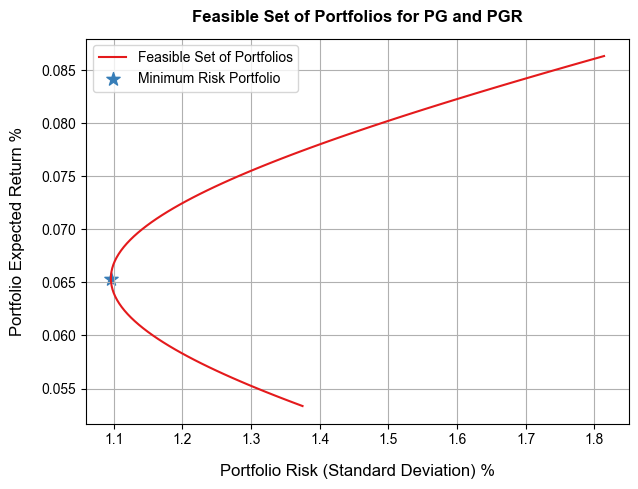

In [ ]:
# 从两个资产的可行集里找到最佳的组合

E_R_PG = np.mean(returns['PG']) * 100
E_R_PGR = np.mean(returns['PGR']) * 100
std_dev_PG = np.std(returns['PG']) * 100
std_dev_PGR = np.std(returns['PGR']) * 100

# 计算两者的协方差
rho = np.cov(returns['PG'], returns['PGR'])[0][1]

# 定义计算投资组合风险和收益的函数
def calculate_portfolio_stats(E_R_PG, E_R_PGR, std_dev_PG, std_dev_PGR, rho, w_PG):
    w_PGR = 1 - w_PG
    E_R_portfolio = w_PG * E_R_PG + w_PGR * E_R_PGR
    portfolio_variance = (w_PG * std_dev_PG)**2 + (w_PGR * std_dev_PGR)**2 + 2 * w_PG * w_PGR * rho * std_dev_PG * std_dev_PGR
    std_dev_portfolio = np.sqrt(portfolio_variance)
    return E_R_portfolio, std_dev_portfolio

# 定义权重变化范围
weights_PG = np.linspace(0, 1, num=100)

# 计算可以组合的风险和收益
portfolio_returns = []
portfolio_risks = []
for w_PG in weights_PG:
    portfolio_return, portfolio_risk = calculate_portfolio_stats(E_R_PG, E_R_PGR, std_dev_PG, std_dev_PGR, rho, w_PG)
    portfolio_returns.append(portfolio_return)
    portfolio_risks.append(portfolio_risk)

# 找到风险最小的投资组合
min_risk = np.min(portfolio_risks)
min_risk_return = portfolio_returns[np.argmin(portfolio_risks)]

# 绘制投资组合的可行集图像
plt.figure(figsize=(7, 5))
plt.plot(portfolio_risks, portfolio_returns, label='Feasible Set of Portfolios', color=color_map(0))
plt.scatter(min_risk, min_risk_return, color=color_map(1), marker='*', s=100, label='Minimum Risk Portfolio')
plt.title('Feasible Set of Portfolios for PG and PGR', pad=12, fontproperties=bold_font)
plt.xlabel('Portfolio Risk (Standard Deviation) %', labelpad=12, fontproperties=regular_font)
plt.ylabel('Portfolio Expected Return %', labelpad=12, fontproperties=regular_font)
plt.legend(prop=legend_font)
plt.grid(True)
plt.show()

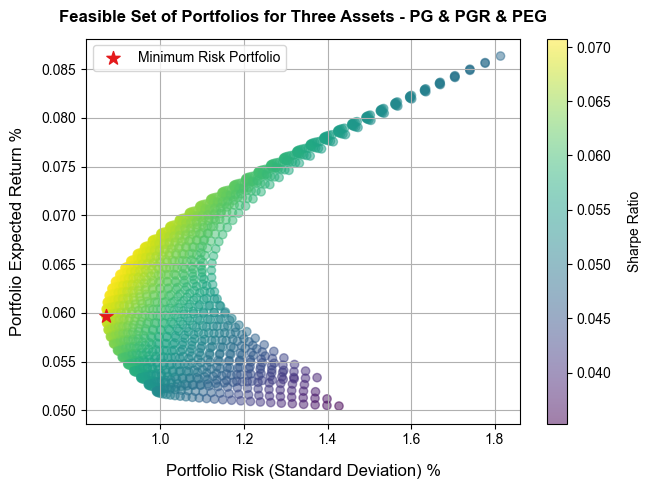

In [12]:
E_R_PG = np.mean(returns['PG']) * 100
E_R_PGR = np.mean(returns['PGR']) * 100
E_R_PEG = np.mean(returns['PEG']) * 100
std_dev_PG = np.std(returns['PG']) * 100
std_dev_PGR = np.std(returns['PGR']) * 100
std_dev_PEG = np.std(returns['PEG']) * 100

# 假设无风险利率
R_f = 0.01 / 252 # 假设无风险年利率为1%，转换为每日利率

# 计算协方差
rho_PG_PGR = np.cov(returns['PG'], returns['PGR'])[0][1]
rho_PG_PEG = np.cov(returns['PG'], returns['PEG'])[0][1]
rho_PGR_PEG = np.cov(returns['PGR'], returns['PEG'])[0][1]

# 生成权重
weights = np.linspace(0, 1, num=50)

# 存储投资组合的风险、收益和夏普比率
portfolio_risks = []
portfolio_returns = []
sharpe_ratios = []

# 遍历所有可能的权重组合
for w_PG in weights:
    for w_PGR in weights:
        w_PEG = 1 - (w_PG + w_PGR) # 保证权重之和为1
        if w_PEG < 0:
            continue # 忽略无效的权重组合
        
        # 计算组合的预期收益
        E_R_portfolio = (w_PG * E_R_PG + w_PGR * E_R_PGR + w_PEG * E_R_PEG)
        
        # 计算组合风险(标准差)
        portfolio_variance = (
            (w_PG * std_dev_PG) ** 2 +
            (w_PGR * std_dev_PGR) ** 2 +
            (w_PEG * std_dev_PEG) ** 2 +
            2 * w_PG * w_PGR * rho_PG_PGR * std_dev_PG * std_dev_PGR +
            2 * w_PG * w_PEG * rho_PG_PEG * std_dev_PG * std_dev_PEG +
            2 * w_PGR * w_PEG * rho_PGR_PEG * std_dev_PGR * std_dev_PEG
        )
        std_dev_portfolio = np.sqrt(portfolio_variance)
        
        # 计算夏普比率
        sharpe_ratio = (E_R_portfolio - R_f) / std_dev_portfolio
        
        portfolio_risks.append(std_dev_portfolio)
        portfolio_returns.append(E_R_portfolio)
        sharpe_ratios.append(sharpe_ratio)

# 找到最小风险组合的索引
min_risk_index = np.argmin(portfolio_risks)
# 获取最小风险组合的风险和收益
min_risk = portfolio_risks[min_risk_index]
min_risk_return = portfolio_returns[min_risk_index]

# 可视化投资组合的可行集，颜色反映夏普比率
plt.figure(figsize=(7, 5))
sc = plt.scatter(portfolio_risks, portfolio_returns, c=sharpe_ratios, cmap='viridis', alpha=0.5)
plt.scatter(min_risk, min_risk_return, color=color_map(0), marker='*', s=100, label='Minimum Risk Portfolio')

cbar = plt.colorbar(sc)
cbar.set_label('Sharpe Ratio', labelpad=12)

# plt.colorbar(sc, label='Sharpe Ratio', labelpad=12)
plt.title('Feasible Set of Portfolios for Three Assets - PG & PGR & PEG', pad=12, fontproperties=bold_font )
plt.xlabel('Portfolio Risk (Standard Deviation) %', labelpad=12, fontproperties=regular_font)
plt.ylabel('Portfolio Expected Return %', labelpad=12, fontproperties=regular_font)
plt.grid(True)
plt.legend(prop=legend_font)
plt.show()

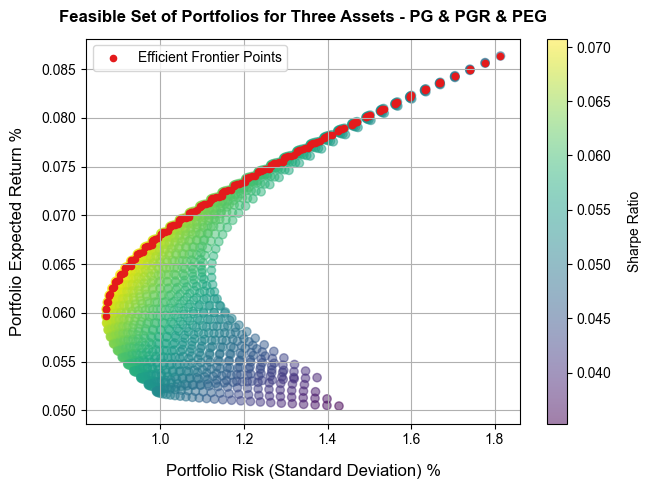

In [ ]:
# 绘制有效前沿

E_R_PG = np.mean(returns['PG']) * 100
E_R_PGR = np.mean(returns['PGR']) * 100
E_R_PEG = np.mean(returns['PEG']) * 100
std_dev_PG = np.std(returns['PG']) * 100
std_dev_PGR = np.std(returns['PGR']) * 100
std_dev_PEG = np.std(returns['PEG']) * 100

# 假设无风险利率
R_f = 0.01 / 252 # 假设无风险年利率为1%，转换为每日利率

# 计算协方差
rho_PG_PGR = np.cov(returns['PG'], returns['PGR'])[0][1]
rho_PG_PEG = np.cov(returns['PG'], returns['PEG'])[0][1]
rho_PGR_PEG = np.cov(returns['PGR'], returns['PEG'])[0][1]

# 生成权重
weights = np.linspace(0, 1, num=50)

# 存储投资组合的风险、收益和夏普比率
portfolio_risks = []
portfolio_returns = []
sharpe_ratios = []

# 遍历所有可能的权重组合
for w_PG in weights:
    for w_PGR in weights:
        w_PEG = 1 - (w_PG + w_PGR) # 保证权重之和为1
        if w_PEG < 0:
            continue # 忽略无效的权重组合
        
        # 计算组合的预期收益
        E_R_portfolio = (w_PG * E_R_PG + w_PGR * E_R_PGR + w_PEG * E_R_PEG)
        
        # 计算组合风险(标准差)
        portfolio_variance = (
            (w_PG * std_dev_PG) ** 2 +
            (w_PGR * std_dev_PGR) ** 2 +
            (w_PEG * std_dev_PEG) ** 2 +
            2 * w_PG * w_PGR * rho_PG_PGR * std_dev_PG * std_dev_PGR +
            2 * w_PG * w_PEG * rho_PG_PEG * std_dev_PG * std_dev_PEG +
            2 * w_PGR * w_PEG * rho_PGR_PEG * std_dev_PGR * std_dev_PEG
        )
        std_dev_portfolio = np.sqrt(portfolio_variance)
        
        # 计算夏普比率
        sharpe_ratio = (E_R_portfolio - R_f) / std_dev_portfolio
        
        portfolio_risks.append(std_dev_portfolio)
        portfolio_returns.append(E_R_portfolio)
        sharpe_ratios.append(sharpe_ratio)

# 找到最小风险组合的索引
min_risk_index = np.argmin(portfolio_risks)
# 获取最小风险组合的风险和收益
min_risk = portfolio_risks[min_risk_index]
min_risk_return = portfolio_returns[min_risk_index]

# 找到有效边界的点（每种风险只取最高收益，确保点在上沿）
efficient_frontier = []

portfolio_risks = np.array(portfolio_risks)
portfolio_returns = np.array(portfolio_returns)

# 合并风险和收益数据，按风险排序
combined = np.array(list(zip(portfolio_risks, portfolio_returns)))
sorted_combined = combined[combined[:, 0].argsort()]  # 按风险值排序

# 初始化追踪变量
max_return_so_far = -np.inf  # 初始化为负无穷大

for risk, portfolio_return in sorted_combined:
    # 如果该点收益高于当前的最大收益，则将其加入有效边界
    if portfolio_return > max_return_so_far:
        efficient_frontier.append((risk, portfolio_return))
        max_return_so_far = portfolio_return  # 更新最大收益

# 转换为有效边界点的 X 和 Y
efficient_risks, efficient_returns = zip(*efficient_frontier)

# 绘图
plt.figure(figsize=(7, 5))

# 绘制所有点
sc = plt.scatter(portfolio_risks, portfolio_returns, c=sharpe_ratios, cmap='viridis', alpha=0.5)

cbar = plt.colorbar(sc)
cbar.set_label('Sharpe Ratio', labelpad=12)

# 添加有效边界点（红色圆点）
plt.scatter(efficient_risks, efficient_returns, color=color_map(0), s=20, label='Efficient Frontier Points')

# 图例与美化
plt.title('Feasible Set of Portfolios for Three Assets - PG & PGR & PEG', pad=12, fontproperties=bold_font )
plt.xlabel('Portfolio Risk (Standard Deviation) %', labelpad=12, fontproperties=regular_font)
plt.ylabel('Portfolio Expected Return %', labelpad=12, fontproperties=regular_font)
plt.grid(True)
plt.legend(prop=legend_font)
plt.show()

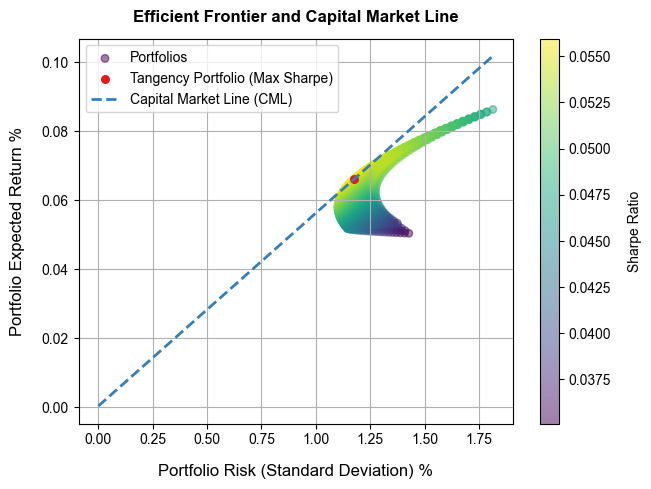

In [17]:
# 考虑无风险资产后的有效前沿

E_R_PG = np.mean(returns['PG']) * 100         
E_R_PGR = np.mean(returns['PGR']) * 100
E_R_PEG = np.mean(returns['PEG']) * 100

std_dev_PG = np.std(returns['PG']) * 100        
std_dev_PGR = np.std(returns['PGR']) * 100
std_dev_PEG = np.std(returns['PEG']) * 100

R_f = 0.08 / 252

# 计算协方差
rho_PG_PGR = np.corrcoef(returns['PG'], returns['PGR'])[0, 1]
rho_PG_PEG = np.corrcoef(returns['PG'], returns['PEG'])[0, 1]
rho_PGR_PEG = np.corrcoef(returns['PGR'], returns['PEG'])[0, 1]

# 计算协方差矩阵
cov_matrix = np.array([
    [std_dev_PG**2, rho_PG_PGR * std_dev_PG * std_dev_PGR, rho_PG_PEG * std_dev_PG * std_dev_PEG],
    [rho_PG_PGR * std_dev_PG * std_dev_PGR, std_dev_PGR**2, rho_PGR_PEG * std_dev_PGR * std_dev_PEG],
    [rho_PG_PEG * std_dev_PG * std_dev_PEG, rho_PGR_PEG * std_dev_PGR * std_dev_PEG, std_dev_PEG**2]
])

expected_returns = np.array([E_R_PG, E_R_PGR, E_R_PEG])  # 三资产的预期收益率

# 投资权重生成
weights = np.linspace(0, 1, num=50)  # 权重生成

# 存储三个关键指标
portfolio_risks = []
portfolio_returns = []
sharpe_ratios = []

# 遍历所有组合权重
for w_PG in weights:
    for w_PGR in weights:
        w_PEG = 1 - (w_PG + w_PGR)  # 确保总权重大于等于1
        if w_PEG < 0:
            continue

        weights_vector = np.array([w_PG, w_PGR, w_PEG])  # 权重向量

        # 计算组合的预期收益
        E_R_portfolio = np.dot(weights_vector, expected_returns)

        # 计算组合的方差及标准差
        portfolio_variance = np.dot(weights_vector.T, np.dot(cov_matrix, weights_vector))
        std_dev_portfolio = np.sqrt(portfolio_variance)

        # 计算夏普比率
        sharpe_ratio = (E_R_portfolio - R_f) / std_dev_portfolio

        portfolio_risks.append(std_dev_portfolio)
        portfolio_returns.append(E_R_portfolio)
        sharpe_ratios.append(sharpe_ratio)

portfolio_risks = np.array(portfolio_risks)
portfolio_returns = np.array(portfolio_returns)
sharpe_ratios = np.array(sharpe_ratios)

# 获取最大夏普比率（切点投资组合）
max_sharpe_idx = np.argmax(sharpe_ratios)
max_sharpe_return = portfolio_returns[max_sharpe_idx]
max_sharpe_risk = portfolio_risks[max_sharpe_idx]
max_sharpe_ratio = sharpe_ratios[max_sharpe_idx]

# 绘制图像
plt.figure(figsize=(7, 5))

# 绘制所有有效组合点
sc = plt.scatter(portfolio_risks, portfolio_returns, c=sharpe_ratios, cmap='viridis', alpha=0.5,  s=30, label='Portfolios')
cbar = plt.colorbar(sc)
cbar.set_label('Sharpe Ratio', labelpad=12)

# 在图中标识切点投资组合
plt.scatter(max_sharpe_risk, max_sharpe_return, color=color_map(0), s=30, label='Tangency Portfolio (Max Sharpe)')

# 绘制有效边界
#plt.plot(portfolio_risks, portfolio_returns, color='blue', alpha=0.6, label='Efficient Frontier')

# 绘制资本市场线（CML）
cml_x = np.linspace(0, max(portfolio_risks), 100)  # 风险范围从 0 到最大风险
cml_y = R_f + max_sharpe_ratio * cml_x  # CML 的公式
plt.plot(cml_x, cml_y, color=color_map(1), linestyle='--', linewidth=2, label='Capital Market Line (CML)')

# 图例与美化
plt.title('Efficient Frontier and Capital Market Line', pad=12, fontproperties=bold_font )
plt.xlabel('Portfolio Risk (Standard Deviation) %', labelpad=12, fontproperties=regular_font)
plt.ylabel('Portfolio Expected Return %', labelpad=12, fontproperties=regular_font)
plt.grid(True)
plt.legend(prop=legend_font)
plt.show()

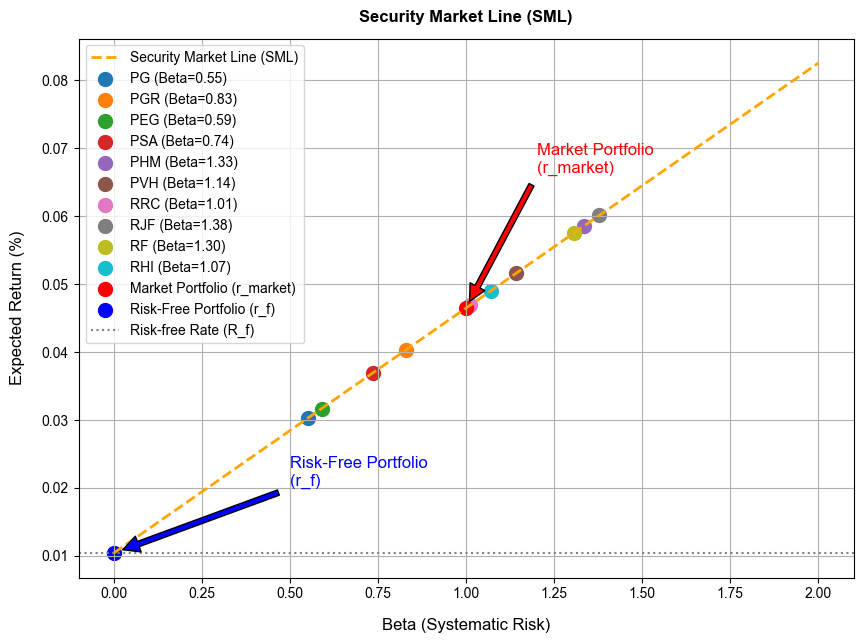

In [36]:
# SML线上的股票的不同beta

# 假设的数据框和基础变量
data_frame = df.copy()
data_frame.iloc[:, 5:] = data_frame.iloc[:, 5:].pct_change()
data_frame.iloc[:, 5:] = data_frame.iloc[:, 5:] * 100
data_frame = data_frame.dropna()

r_market = data_frame['r_market'] # 已经乘了100
r_f = data_frame['rfr'] # 已经乘了100
asset_columns = ['PG', 'PGR', 'PEG', 'PSA', 'PHM', 'PVH', 'RRC', 'RJF', 'RF', 'RHI']

# 计算市场超额收益
excess_market_return = r_market - r_f

# 计算年度期望值
E_R_m = np.mean(r_market)         # 市场组合的预期收益
R_f = np.mean(r_f)                # 无风险利率
market_var = np.var(excess_market_return)  # 市场收益的方差

# 计算每个资产的 Beta
betas = {}
expected_returns = {}
for asset in asset_columns:
    # 计算协方差（资产收益率与市场超额收益）
    cov_with_market = np.cov(data_frame[asset], excess_market_return)[0, 1]
    beta = cov_with_market / market_var  # 计算 Beta
    betas[asset] = beta
    
    # 使用 CAPM 模型计算期望收益率
    E_R_i = R_f + beta * (E_R_m - R_f)
    expected_returns[asset] = E_R_i

plt.figure(figsize=(10, 7))
# SML是期望收益与Beta 的关系

beta_range = np.linspace(0, 2, 100)
sml_line = R_f + beta_range * (E_R_m - R_f)
plt.plot(beta_range, sml_line, color='orange', label='Security Market Line (SML)', linestyle='--', linewidth=2)

# 绘制示例资产的位置
for asset in asset_columns:
    plt.scatter(betas[asset], expected_returns[asset], label=f'{asset} (Beta={betas[asset]:.2f})', s=100)

# 特别标注市场组合 r_market 和无风险利率 rfr
plt.scatter(1, E_R_m, color='red', s=100, label='Market Portfolio (r_market)')  # 市场组合的点 (Beta=1)
plt.scatter(0, R_f, color='blue', s=100, label='Risk-Free Portfolio (r_f)')  # 无风险利率的点 (Beta=0)

# 使用箭头注释 r_market (市场组合)
plt.annotate('Market Portfolio\n(r_market)',
             xy=(1, E_R_m), 
             xytext=(1.2, E_R_m + 0.02), 
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

# 使用箭头注释 rfr (无风险利率)
plt.annotate('Risk-Free Portfolio\n(r_f)',
             xy=(0, R_f), 
             xytext=(0.5, R_f + 0.01), 
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=12, color='blue')

# 图例与美化
plt.title('Security Market Line (SML)', pad=12, fontproperties=bold_font )
plt.xlabel('Beta (Systematic Risk)', labelpad=12, fontproperties=regular_font)
plt.ylabel('Expected Return (%)', labelpad=12, fontproperties=regular_font)
plt.axhline(y=R_f, color='gray', linestyle=':', label='Risk-free Rate (R_f)')
plt.grid(True)
plt.legend(prop=legend_font)
plt.show()

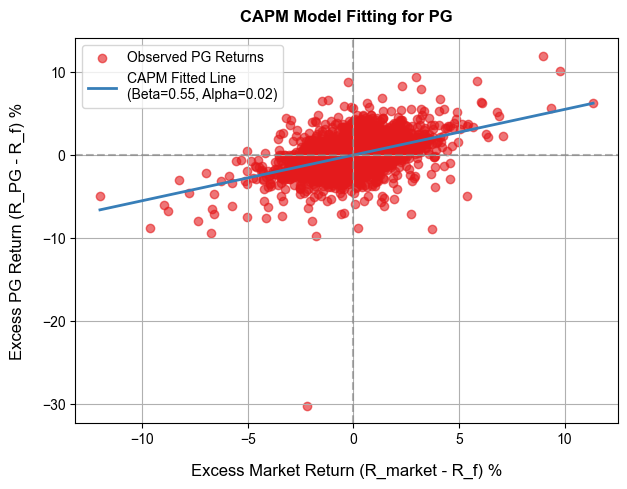

In [38]:
r_market = data_frame['r_market'] # 市场组合收益
r_f = data_frame['rfr'] # 无风险收益率
r_pg = data_frame['PG']                                  
#r_pg = df['PG'].pct_change().dropna()  
#r_pg = r_pg * 100
#         
excess_market_return = (r_market - r_f)
excess_pg_return = (r_pg - r_f)

# 2. CAPM回归：计算 Beta 值
market_variance = np.var(excess_market_return)     # 市场超额收益的方差
covariance_pg_market = np.cov(excess_pg_return, excess_market_return)[0, 1]  # PG和市场收益的协方差
beta_pg = covariance_pg_market / market_variance   # Beta 值的计算

# 3. CAPM预测：拟合线计算
alpha_pg = np.mean(excess_pg_return) - beta_pg * np.mean(excess_market_return)  # 计算截距 alpha
r_pg_fitted = alpha_pg + beta_pg * excess_market_return  # CAPM 拟合值

# 4. 绘图
plt.figure(figsize=(7, 5))

# 原始数据的散点图
plt.scatter(excess_market_return, excess_pg_return, color=color_map(0), alpha=0.6, label='Observed PG Returns')

# CAPM拟合直线
# 对市场超额收益排序，避免由于排序混乱导致的拟合曲线问题
sorted_indices = np.argsort(excess_market_return)  # 对 x 轴数据进行排序
sorted_market_return = excess_market_return.iloc[sorted_indices]  # 排序后的超额市场收益
sorted_pg_fitted = r_pg_fitted.iloc[sorted_indices]  # 排序后的拟合结果
plt.plot(sorted_market_return, sorted_pg_fitted, color=color_map(1), linewidth=2, label=f'CAPM Fitted Line\n(Beta={beta_pg:.2f}, Alpha={alpha_pg:.2f})')

# 图例与美化
plt.title('CAPM Model Fitting for PG', pad=12, fontproperties=bold_font )
plt.xlabel('Excess Market Return (R_market - R_f) %', labelpad=12, fontproperties=regular_font)
plt.ylabel('Excess PG Return (R_PG - R_f) %', labelpad=12, fontproperties=regular_font)
plt.axhline(0, color='gray', linestyle='--', alpha=0.6)
plt.axvline(0, color='gray', linestyle='--', alpha=0.6)
plt.grid(True)
plt.legend(prop=legend_font)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     2319.
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:45:31   Log-Likelihood:                -14177.
No. Observations:                8752   AIC:                         2.836e+04
Df Residuals:                    8750   BIC:                         2.837e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0231      0.013      1.765      0.0

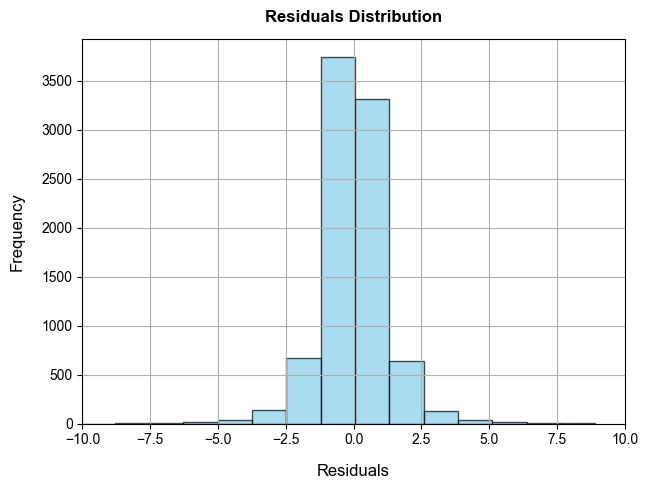

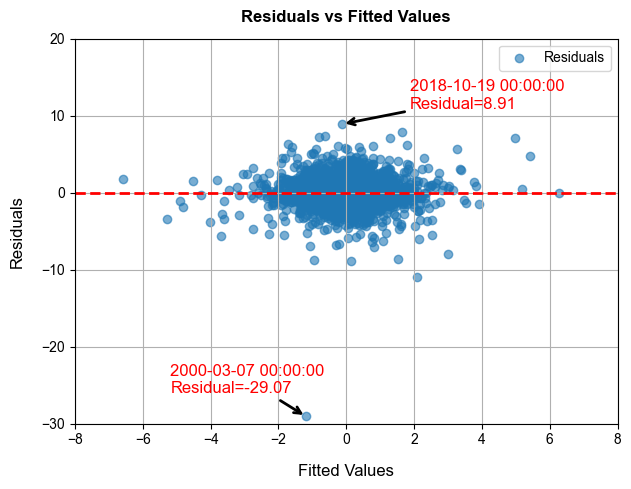

In [44]:
# 用statsmodels库实现CAPM模型

# 确保数据 aline（对齐并剔除NaN）
#r_pg = df['PG'].pct_change().fillna(0) # PG 收益率
#r_pg = r_pg * 100                     # 转换为百分比

r_pg = data_frame['PG']
r_market = data_frame['r_market']             # 市场组合
r_f = data_frame['rfr']                       # 无风险利率

# 超额收益计算
excess_market_return = (r_market - r_f)   # 市场超额收益
excess_pg_return = (r_pg - r_f)           # PG 的超额收益

excess_market_return = pd.DataFrame({'R_market': excess_market_return})
X = sm.add_constant(excess_market_return)  # 市场超额收益 + 常数项
Y = excess_pg_return                       # PG 的超额收益

# OLS 回归
model = sm.OLS(Y, X).fit()

# 回归结果摘要
print(model.summary())

# 提取结果
alpha_pg = model.params['const']  # 截距（Alpha）
beta_pg = model.params['R_market']  # 斜率（Beta）
alpha_p_val = model.pvalues['const']  # Alpha 的 p 值
beta_p_val = model.pvalues['R_market']  # Beta 的 p 值
r_squared = model.rsquared  # R^2拟合优度

# 输出指标结果
print("\nCAPM模型检验结果:")
print(f"Alpha (Intercept): {alpha_pg:.4f}, p-value: {alpha_p_val:.4f}")
print(f"Beta (Slope): {beta_pg:.4f}, p-value: {beta_p_val:.4f}")
print(f"R-squared: {r_squared:.4f}")

# 检查残差分布
residuals = model.resid
plt.figure(figsize=(7, 5))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Residuals Distribution', pad=12, fontproperties=bold_font )
plt.xlim(-10, 10)
plt.xlabel('Residuals', labelpad=12, fontproperties=regular_font)
plt.ylabel('Frequency', labelpad=12, fontproperties=regular_font)
plt.grid(True)
#plt.legend(prop=legend_font)
plt.show()

# 找到最大残差的值、索引以及对应日期
max_residual = residuals.max()  # 最大残差值
max_residual_index = residuals.idxmax()  # 对应的索引（index）
max_residual_date = df.loc[max_residual_index, 'date']  # 获取对应日期

# 找到最小残差的值、索引以及对应日期
min_residual = residuals.min()  # 最小残差值
min_residual_index = residuals.idxmin()  # 最小残差值对应的索引
min_residual_date = df.loc[min_residual_index, 'date']  # 获取最小残差对应的日期

# 残差与预测值散点图
plt.figure(figsize=(7, 5))
plt.scatter(model.fittedvalues, residuals, alpha=0.6, label='Residuals')

# 用箭头标注最大残差点
plt.annotate(
    f'{max_residual_date}\nResidual={max_residual:.2f}',  # 注释内容
    xy=(model.fittedvalues[max_residual_index], max_residual),  # 箭头指向的位置 (预测值, 最大残差)
    xytext=(model.fittedvalues[max_residual_index] + 2, max_residual + 2),  # 注释文本的位置
    arrowprops=dict(facecolor='red', arrowstyle='->', lw=2),  # 箭头样式
    fontsize=12, color='red'
)

plt.annotate(
    f'{min_residual_date}\nResidual={min_residual:.2f}',  # 注释内容为日期和残差值
    xy=(model.fittedvalues[min_residual_index], min_residual),  # 箭头指向最小残差位置 (预测值, 最小残差)
    xytext=(model.fittedvalues[min_residual_index] - 4, min_residual + 3),  # 注释文字偏移位置
    arrowprops=dict(facecolor='red', arrowstyle='->', lw=2),  # 蓝色箭头样式
    fontsize=12, color='red'
)

# 添加辅助线
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Fitted Values', pad=12, fontproperties=bold_font )
plt.xlabel('Fitted Values', labelpad=12, fontproperties=regular_font)
plt.ylabel('Residuals', labelpad=12, fontproperties=regular_font)
plt.xlim(-8, 8)
plt.ylim(-30, 20)
plt.grid(True)
plt.legend(prop=legend_font)
plt.show()

In [45]:
# 找到最大/最小对应的点

r_pg = data_frame['PG']
r_market = data_frame['r_market']             # 市场组合
r_f = data_frame['rfr']                       # 无风险利率

# 超额收益计算
excess_market_return = (r_market - r_f)    # 市场超额收益
excess_pg_return = (r_pg - r_f)            # PG 的超额收益
excess_market_return = pd.DataFrame({'R_market': excess_market_return})

X = sm.add_constant(excess_market_return)  # CAPM 模型中的自变量
Y = excess_pg_return                       # PG 的超额收益（因变量）

# 回归一次完整数据集
model = sm.OLS(Y, X).fit()

# 检查残差并找到最大和最小残差对应的点
residuals = model.resid                     # 残差
max_residual_index = residuals.idxmax()     # 找到最大残差索引
min_residual_index = residuals.idxmin()     # 找到最小残差索引

# 显示找到的异常点
print(f"Max Residual: {residuals[max_residual_index]:.4f}, Date: {df.loc[max_residual_index, 'date']}")
print(f"Min Residual: {residuals[min_residual_index]:.4f}, Date: {df.loc[min_residual_index, 'date']}")

# 去除最大和最小残差点
X_cleaned = X.drop([max_residual_index, min_residual_index])  # 删除异常点的自变量
Y_cleaned = Y.drop([max_residual_index, min_residual_index])  # 删除异常点的因变量

# 再次回归剔除异常点后的数据
model_cleaned = sm.OLS(Y_cleaned, X_cleaned).fit()

# 显示剔除异常点后的回归结果摘要
print("\nRegression Results After Removing Outliers:")
print(model_cleaned.summary())

# 提取清理后的结果
alpha_pg_cleaned = model_cleaned.params['const']       # 截距（Alpha）
beta_pg_cleaned = model_cleaned.params['R_market']     # 斜率（Beta）
alpha_p_val_cleaned = model_cleaned.pvalues['const']   # Alpha 的 p 值
beta_p_val_cleaned = model_cleaned.pvalues['R_market'] # Beta 的 p 值
r_squared_cleaned = model_cleaned.rsquared            # R^2 拟合优度

# 输出清理后的指标结果
print("\nCAPM 模型检验结果 (去除异常点):")
print(f"Alpha (Intercept): {alpha_pg_cleaned:.4f}, p-value: {alpha_p_val_cleaned:.4f}")
print(f"Beta (Slope): {beta_pg_cleaned:.4f}, p-value: {beta_p_val_cleaned:.4f}")
print(f"R-squared: {r_squared_cleaned:.4f}")

Max Residual: 8.9054, Date: 2018-10-19 00:00:00
Min Residual: -29.0660, Date: 2000-03-07 00:00:00

Regression Results After Removing Outliers:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     2444.
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:48:08   Log-Likelihood:                -13854.
No. Observations:                8750   AIC:                         2.771e+04
Df Residuals:                    8748   BIC:                         2.773e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025 

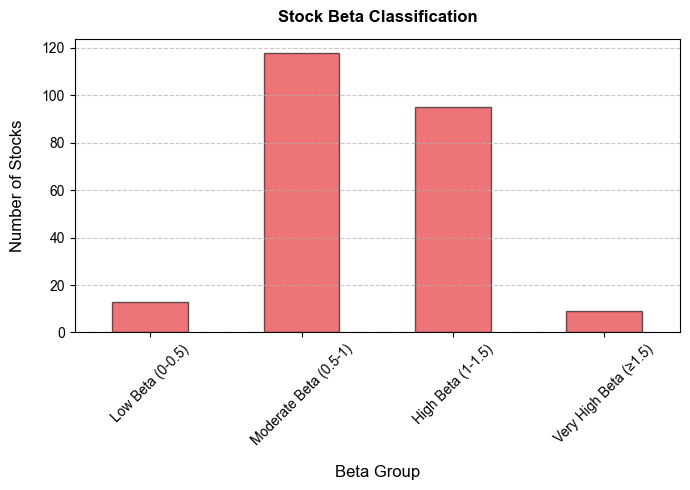

In [132]:
# 对所有股票beta进行分组, 分成四组，并统计每组的股票数量

r_market = data_frame['r_market']             # 市场组合
r_f = data_frame['rfr']                       # 无风险利率

# 超额收益计算
excess_market_return = (r_market - r_f)    # 市场超额收益

# 提取从第 5 列开始的所有股票列
stock_columns = data_frame.columns[5:]  # 股票标的列，假设从第 5 列开始是标的
betas = {}  # 用于存储 Beta 值的字典

# 批量计算 Beta 值
for stock in stock_columns:
    # 超额收益计算
    r_stock = data_frame[stock]      # 计算收益率
    excess_stock_return = (r_stock - r_f)  # 计算股票的超额收益
    
    # CAPM 回归：计算 Beta 值
    market_variance = np.var(excess_market_return)  # 市场超额收益的方差
    covariance_stock_market = np.cov(excess_stock_return, excess_market_return)[0, 1]  # 股票和市场收益的协方差
    beta_stock = covariance_stock_market / market_variance  # Beta 值的计算

    # 添加到字典中
    betas[stock] = beta_stock

# 转换 Beta 数据为 DataFrame
beta_df = pd.DataFrame(list(betas.items()), columns=['Stock', 'Beta']).sort_values(by='Beta', ascending=True)

# 进行 Beta 分组
def classify_beta(beta):
    if 0 <= beta < 0.5:
        return 'Low Beta (0-0.5)'
    elif 0.5 <= beta < 1:
        return 'Moderate Beta (0.5-1)'
    elif 1 <= beta < 1.5:
        return 'High Beta (1-1.5)'
    else:
        return 'Very High Beta (≥1.5)'

beta_df['Beta Group'] = beta_df['Beta'].apply(classify_beta)

# 按 Beta 分组统计股票数量（确保按照指定顺序分类）
beta_categories = ['Low Beta (0-0.5)', 'Moderate Beta (0.5-1)',
                   'High Beta (1-1.5)', 'Very High Beta (≥1.5)']
beta_df['Beta Group'] = pd.Categorical(beta_df['Beta Group'], categories=beta_categories, ordered=True)

# 统计每组的股票个数
beta_group_counts = beta_df['Beta Group'].value_counts().loc[beta_categories]  # 按照指定顺序排列统计值

# 绘制柱状图
plt.figure(figsize=(7, 5))
beta_group_counts.plot(kind='bar', color=color_map(0), alpha=0.6, edgecolor='black')
plt.title('Stock Beta Classification', pad=12, fontproperties=bold_font )
plt.xlabel('Beta Group', labelpad=12, fontproperties=regular_font)
plt.ylabel('Number of Stocks', labelpad=12, fontproperties=regular_font)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


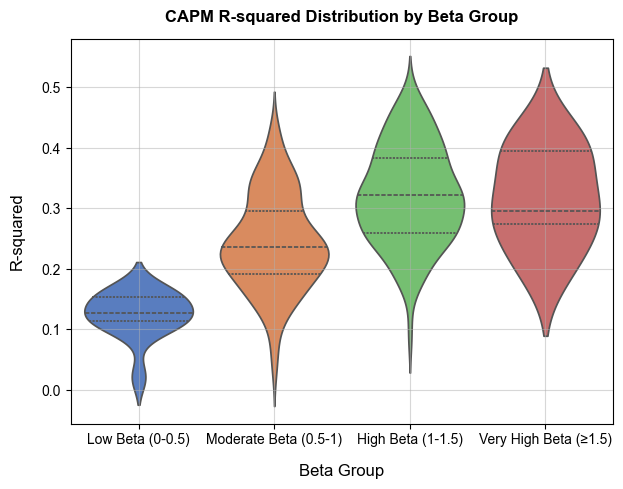

In [60]:
# 假设市场组合收益和无风险利率的数据
r_market = data_frame['r_market']                          # 市场组合收益
r_f = data_frame['rfr']                                    # 无风险利率

# 提取从第 5 列开始的所有股票列
stock_columns = data_frame.columns[5:]  # 股票标的列，假设从第 5 列开始是标的
betas = {}
r_squareds = {}  # 针对 R^2 的存储

# 市场超额收益计算
excess_market_return = (r_market - r_f)    # 市场超额收益，去掉第一行
excess_market_return = pd.DataFrame({'R_market': excess_market_return})

# 批量计算 Beta 和 CAPM R^2
for stock in stock_columns:
    # 超额收益计算
    r_stock = data_frame[stock]
    excess_stock_return = (r_stock - r_f)  # 股票的超额收益
    
    # CAPM 回归
    X = sm.add_constant(excess_market_return)       # 市场超额收益，加常数项
    Y = excess_stock_return
    model = sm.OLS(Y, X).fit()                      # 线性回归
    beta_stock = model.params['R_market']           # 提取 Beta（斜率）
    r_squared_stock = model.rsquared                # 提取 R^2 值

    # 将结果存储
    betas[stock] = beta_stock
    r_squareds[stock] = r_squared_stock

# 转换结果为 DataFrame
beta_df = pd.DataFrame({'Stock': list(betas.keys()), 
                        'Beta': list(betas.values()), 
                        'R_squared': list(r_squareds.values())})

# 自定义 Beta 分组函数
def classify_beta(beta):
    if 0 <= beta < 0.5:
        return 'Low Beta (0-0.5)'
    elif 0.5 <= beta < 1:
        return 'Moderate Beta (0.5-1)'
    elif 1 <= beta < 1.5:
        return 'High Beta (1-1.5)'
    else:
        return 'Very High Beta (≥1.5)'

# Beta 分组
beta_df['Beta Group'] = beta_df['Beta'].apply(classify_beta)

# 添加顺序分类（有助于可视化时排序）
beta_categories = ['Low Beta (0-0.5)', 'Moderate Beta (0.5-1)', 
                   'High Beta (1-1.5)', 'Very High Beta (≥1.5)']
beta_df['Beta Group'] = pd.Categorical(beta_df['Beta Group'], categories=beta_categories, ordered=True)

# 分组统计 R^2，分别计算每组内的分布
group_r_squareds = beta_df.groupby('Beta Group')['R_squared']

# 绘制小提琴图，显示每组的 R^2 分布
plt.figure(figsize=(7, 5))
sns.violinplot(x='Beta Group', y='R_squared', data=beta_df, palette='muted', inner='quartile')

plt.title('CAPM R-squared Distribution by Beta Group', pad=12, fontproperties=bold_font )
plt.xlabel('Beta Group', labelpad=12, fontproperties=regular_font)
plt.ylabel('R-squared', labelpad=12, fontproperties=regular_font)
plt.grid(True, alpha=0.5)
plt.show()

In [168]:
# 计算日收益率
stock_prices = df.iloc[:, 5:]  # 假设从第5列开始到最后是股票的价格
returns = stock_prices.pct_change().dropna()  # 计算日收益率并丢弃缺失值
stock_list = list(returns.columns)

In [63]:
import yfinance as yf

stocks = list(data_frame.iloc[:, 5:].columns)

# 创建一个空的 DataFrame 用于存储结果
stock_info = []

# 遍历股票列表，从 Yahoo Finance 获取每个股票的行业信息
for stock in stocks:
    try:
        stock_data = yf.Ticker(stock).info  # 获取股票基本信息
        industry = stock_data.get('industry', 'N/A')  # 提取 "industry" 信息
        sector = stock_data.get('sector', 'N/A')  # 提取 "sector" 信息
        print(f"{stock}: Sector={sector}, Industry={industry}")
        stock_info.append({'Stock': stock, 'Sector': sector, 'Industry': industry})  # 添加到结果列表
    except Exception as e:
        print(f"Failed to get data for {stock}: {e}")
        stock_info.append({'Stock': stock, 'Sector': 'N/A', 'Industry': 'N/A'})  # 若获取失败，填入 N/A

# 转换结果为 DataFrame
stock_info_df = pd.DataFrame(stock_info)

stock_info_df

PG: Sector=Consumer Defensive, Industry=Household & Personal Products
PGR: Sector=Financial Services, Industry=Insurance - Property & Casualty
PEG: Sector=Utilities, Industry=Utilities - Regulated Electric
PSA: Sector=Real Estate, Industry=REIT - Industrial
PHM: Sector=Consumer Cyclical, Industry=Residential Construction
PVH: Sector=Consumer Cyclical, Industry=Apparel Manufacturing
RRC: Sector=Energy, Industry=Oil & Gas E&P
RJF: Sector=Financial Services, Industry=Asset Management
RF: Sector=Financial Services, Industry=Banks - Regional
RHI: Sector=Industrials, Industry=Staffing & Employment Services
ROK: Sector=Industrials, Industry=Specialty Industrial Machinery
ROST: Sector=Consumer Cyclical, Industry=Apparel Retail
SLB: Sector=Energy, Industry=Oil & Gas Equipment & Services
SEE: Sector=Consumer Cyclical, Industry=Packaging & Containers
SHW: Sector=Basic Materials, Industry=Specialty Chemicals
SWKS: Sector=Technology, Industry=Semiconductors
SNA: Sector=Industrials, Industry=Tools &

,Stock,Sector,Industry
0,PG,Consumer Defensive,Household & Personal Products
1,PGR,Financial Services,Insurance - Property & Casualty
2,PEG,Utilities,Utilities - Regulated Electric
3,PSA,Real Estate,REIT - Industrial
4,PHM,Consumer Cyclical,Residential Construction
...,...,...,...
230,PCG,Utilities,Utilities - Regulated Electric
231,PNW,Utilities,Utilities - Regulated Electric
232,PNC,Financial Services,Banks - Regional
233,PPG,Basic Materials,Specialty Chemicals


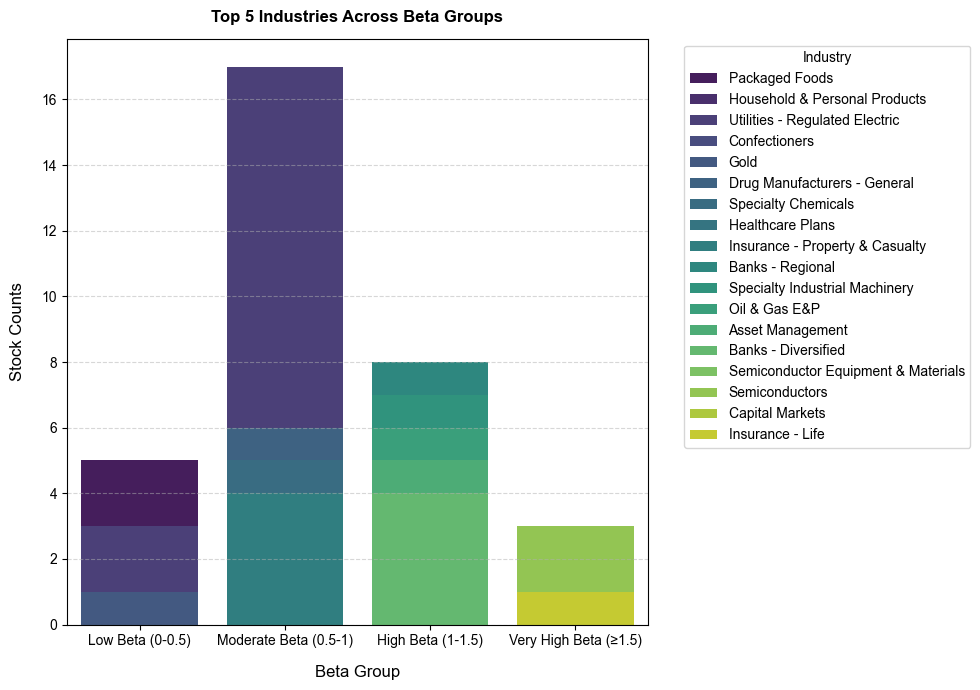

In [69]:
# 合并股票信息和 Beta 数据
combined_df = pd.merge(beta_df, stock_info_df, on="Stock")

# 按 Beta Group 和 Industry 统计行业分布
industry_group_counts = combined_df.groupby(['Beta Group', 'Industry']).size().reset_index(name='Count')

# 自定义 Beta 分组顺序
beta_categories = ['Low Beta (0-0.5)', 'Moderate Beta (0.5-1)', 
                   'High Beta (1-1.5)', 'Very High Beta (≥1.5)']
industry_group_counts['Beta Group'] = pd.Categorical(industry_group_counts['Beta Group'], categories=beta_categories, ordered=True)

# 筛选每个 Beta 组内的前 5 个行业（按 Count 排序）
top_industries = industry_group_counts.groupby('Beta Group').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

plt.figure(figsize=(10, 7))

# 每个 Beta Group 保留前 5 行业，使用 dodge 仅在组内分隔
sns.barplot(
    x='Beta Group', 
    y='Count', 
    hue='Industry', 
    data=top_industries, 
    dodge=False,  # 禁用分组内分隔，使每组独立显示
    palette='viridis'
)

# 图表美化和重新布局
plt.title('Top 5 Industries Across Beta Groups', pad=12, fontproperties=bold_font )
plt.xlabel('Beta Group', labelpad=12, fontproperties=regular_font)
plt.ylabel('Stock Counts', labelpad=12, fontproperties=regular_font)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left', prop=legend_font)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [70]:
combined_df

,Stock,Beta,R_squared,Beta Group,Sector,Industry
0,PG,0.551347,0.209493,Moderate Beta (0.5-1),Consumer Defensive,Household & Personal Products
1,PGR,0.829165,0.272149,Moderate Beta (0.5-1),Financial Services,Insurance - Property & Casualty
2,PEG,0.589889,0.222484,Moderate Beta (0.5-1),Utilities,Utilities - Regulated Electric
3,PSA,0.736473,0.231674,Moderate Beta (0.5-1),Real Estate,REIT - Industrial
4,PHM,1.333213,0.300416,High Beta (1-1.5),Consumer Cyclical,Residential Construction
...,...,...,...,...,...,...
230,PCG,0.633872,0.078624,Moderate Beta (0.5-1),Utilities,Utilities - Regulated Electric
231,PNW,0.526132,0.163740,Moderate Beta (0.5-1),Utilities,Utilities - Regulated Electric
232,PNC,1.192705,0.394543,High Beta (1-1.5),Financial Services,Banks - Regional
233,PPG,0.972612,0.416252,Moderate Beta (0.5-1),Basic Materials,Specialty Chemicals


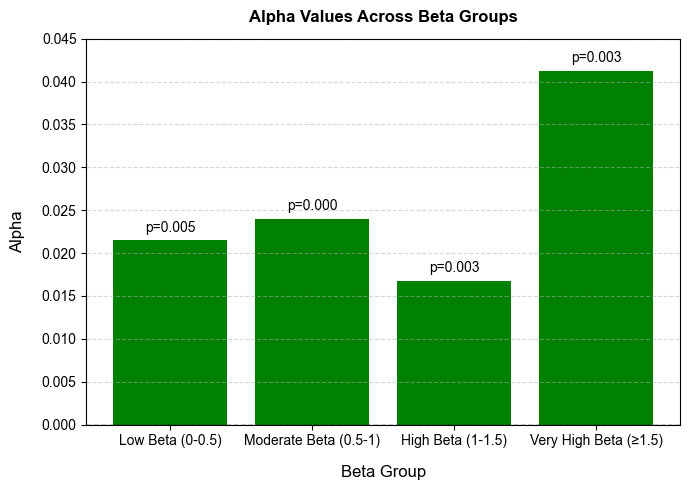

In [72]:

r_market = data_frame['r_market']                          # 市场组合收益
r_f = data_frame['rfr']                                    # 无风险收益率
stock_columns = data_frame.columns[5:]    

# 市场超额收益计算
excess_market_return = (r_market - r_f)

# 初始化列表存储每组的回归结果
alpha_results = {'Beta Group': [], 'Alpha': [], 'p-value': []}

beta_categories = ['Low Beta (0-0.5)', 'Moderate Beta (0.5-1)', 
                   'High Beta (1-1.5)', 'Very High Beta (≥1.5)']

# 按 Beta 分组回归
for beta_group in combined_df['Beta Group'].unique():
    # 筛选属于当前组别的股票
    stocks_in_group = combined_df[combined_df['Beta Group'] == beta_group]['Stock']
    
    # 收集当前组股票的超额收益
    group_excess_stock_return = pd.DataFrame()
    for stock in stocks_in_group:
        r_stock = data_frame[stock]
        excess_stock_return = (r_stock - r_f)  # 计算超额收益
        group_excess_stock_return[stock] = excess_stock_return

    # 将组内所有股票超额收益取平均值，代表该组的超额收益
    avg_group_excess = group_excess_stock_return.mean(axis=1)

    # 回归分析
    X = sm.add_constant(excess_market_return)  # 自变量（市场超额收益，加常数项）
    Y = avg_group_excess                       # 因变量（组平均超额收益）
    model = sm.OLS(Y, X).fit()                 # OLS 回归模型

    # 获取回归结果中的 Alpha 和 p-value
    alpha = model.params['const']              # 截距（Alpha）
    p_value = model.pvalues['const']           # 截距的 p-value
    
    # 存储结果
    alpha_results['Beta Group'].append(beta_group)
    alpha_results['Alpha'].append(alpha)
    alpha_results['p-value'].append(p_value)

# 将结果转换为 DataFrame
alpha_df = pd.DataFrame(alpha_results)

# 确定 Beta Group 的顺序
beta_categories = ['Low Beta (0-0.5)', 'Moderate Beta (0.5-1)', 'High Beta (1-1.5)', 'Very High Beta (≥1.5)']

# 指定 Beta Group 顺序
alpha_df['Beta Group'] = pd.Categorical(alpha_df['Beta Group'], categories=beta_categories, ordered=True)

# 按指定顺序排序数据
alpha_df = alpha_df.sort_values('Beta Group')

# 可视化结果
plt.figure(figsize=(7, 5))

# 条形图绘制 Alpha 值，并用颜色区分统计显著性
colors = ['green' if p < 0.05 else 'red' for p in alpha_df['p-value']]
plt.bar(alpha_df['Beta Group'], alpha_df['Alpha'], color=colors)

# 添加辅助线
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# 图表美化
plt.title('Alpha Values Across Beta Groups', pad=12, fontproperties=bold_font )
plt.xlabel('Beta Group', labelpad=12, fontproperties=regular_font)
plt.ylabel('Alpha', labelpad=12, fontproperties=regular_font)
plt.ylim(0, 0.045)
plt.grid(axis='y', linestyle='--', alpha=0.5)


# 标注每组的 p-value
for i, (alpha, p) in enumerate(zip(alpha_df['Alpha'], alpha_df['p-value'])):
    plt.text(i, alpha + 0.001, f'p={p:.3f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

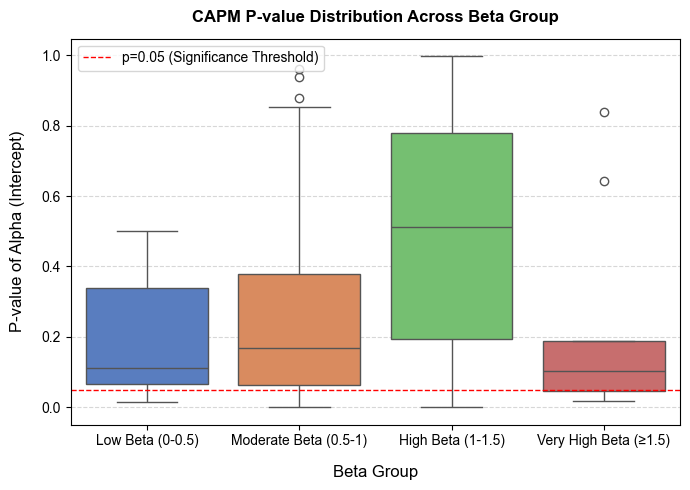

In [133]:
# CAPM下P-value分布

r_market = data_frame['r_market']                          # 市场组合收益
r_f = data_frame['rfr']                                    # 无风险收益率
stock_columns = data_frame.columns[5:]                     # 假设股票数据从第 5 列开始
excess_market_return = (r_market - r_f)

# 初始化存储结果
stock_results = {'Beta Group': [], 'Stock': [], 'Alpha': [], 'p-value': []}

# 定义 Beta 分组类别
beta_categories = ['Low Beta (0-0.5)', 'Moderate Beta (0.5-1)', 
                   'High Beta (1-1.5)', 'Very High Beta (≥1.5)']

# 按 Beta 分组，对每只股票回归
for beta_group in combined_df['Beta Group'].unique():
    # 筛选当前 Beta 分组的股票
    stocks_in_group = combined_df[combined_df['Beta Group'] == beta_group]['Stock']
    
    # 为每只股票单独回归
    for stock in stocks_in_group:
        r_stock = data_frame[stock]
        excess_stock_return = (r_stock - r_f)
        
        # 检查有效样本量
        if len(excess_stock_return) < 10:
            continue  # 样本过少，跳过

        # 数据对齐，确保自变量和因变量匹配
        aligned_market = excess_market_return.loc[excess_stock_return.index]  # 对齐市场收益
        X = sm.add_constant(aligned_market)                                  # 添加常数项
        Y = excess_stock_return                                              # 对齐的股票超额收益
        
   
        model = sm.OLS(Y, X).fit()
        alpha = float(model.params['const'])         # 截距（Alpha）
        p_value = float(model.pvalues['const'])        # P-value

        if p_value <= 0 or p_value >= 1:
            continue

        # 打印调试信息
        #print(f"Stock: {stock}, P-Value: {p_value}, Alpha: {alpha}")

        # 存储结果
        stock_results['Beta Group'].append(beta_group)
        stock_results['Stock'].append(stock)
        stock_results['Alpha'].append(alpha)
        stock_results['p-value'].append(p_value)

# 转换为 DataFrame
stock_df = pd.DataFrame(stock_results)
stock_df = stock_df.dropna()
stock_df = stock_df[(stock_df['p-value'] > 0) & (stock_df['p-value'] < 1)]

# 确保 Beta 分组按指定顺序排列
stock_df['Beta Group'] = pd.Categorical(stock_df['Beta Group'], categories=beta_categories, ordered=True)

# 绘制箱线图
plt.figure(figsize=(7, 5))
sns.boxplot(x='Beta Group', y='p-value', data=stock_df, palette='muted')

# 图表美化
plt.title('CAPM P-value Distribution Across Beta Group', pad=12, fontproperties=bold_font )
plt.xlabel('Beta Group', labelpad=12, fontproperties=regular_font)
plt.ylabel('P-value of Alpha (Intercept)', labelpad=12, fontproperties=regular_font)
plt.axhline(0.05, color='red', linestyle='--', linewidth=1, label='p=0.05 (Significance Threshold)')
plt.legend(prop=legend_font)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

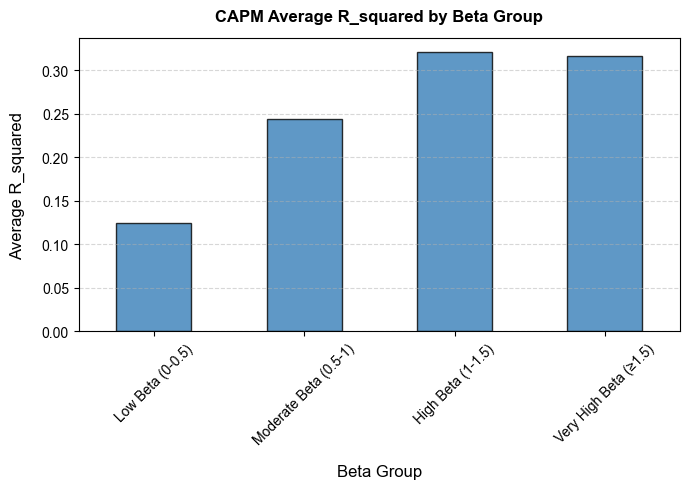

In [135]:
# 画出R方统计量

r_market = data_frame['r_market'] 
r_f = data_frame['rfr'] 
stock_columns = data_frame.columns[5:]    # 假设股票数据从第 5 列开始
excess_market_return = (r_market - r_f)

# 初始化存储结果
capm_results = {'Beta Group': [], 'Stock': [], 'Alpha': [], 'R_squared': []}

# 定义 Beta 分组类别
beta_categories = ['Low Beta (0-0.5)', 'Moderate Beta (0.5-1)', 
                   'High Beta (1-1.5)', 'Very High Beta (≥1.5)']

# 按 Beta 分组逐只股票回归
for beta_group in combined_df['Beta Group'].unique():
    # 筛选当前分组的股票
    stocks_in_group = combined_df[combined_df['Beta Group'] == beta_group]['Stock']
    
    for stock in stocks_in_group:
        r_stock = data_frame[stock]
        excess_stock_return = (r_stock - r_f)

        # 检查有效样本量
        if len(excess_stock_return) < 10:
            continue  # 样本过少跳过

        # 数据对齐和回归
        aligned_market = excess_market_return.loc[excess_stock_return.index]  # 对齐市场收益
        X = sm.add_constant(aligned_market)                                  # 添加常数项
        Y = excess_stock_return                                              # 股票超额收益

        try:
            model = sm.OLS(Y, X).fit()  # CAPM 回归
            alpha = model.params['const']  # Alpha 截距
            r_squared = model.rsquared     # R_squared
        except Exception as e:
            print(f"Error processing stock {stock}: {e}")
            continue

        # 存储结果
        capm_results['Beta Group'].append(beta_group)
        capm_results['Stock'].append(stock)
        capm_results['Alpha'].append(alpha)
        capm_results['R_squared'].append(r_squared)

# 转换为 DataFrame
capm_df = pd.DataFrame(capm_results)

# 确保 Beta Group 顺序
capm_df['Beta Group'] = pd.Categorical(capm_df['Beta Group'], categories=beta_categories, ordered=True)

# 计算每个 Beta 分组的平均 R_squared
r_squared_means_CAPM = capm_df.groupby('Beta Group')['R_squared'].mean()

# 可视化：条形图展示平均 R_squared
plt.figure(figsize=(7, 5))
r_squared_means_CAPM.plot(kind='bar', color=color_map(1), edgecolor='black', alpha=0.8)



plt.title('CAPM Average R_squared by Beta Group', pad=12, fontproperties=bold_font )
plt.xticks(rotation=45)
plt.xlabel('Beta Group', labelpad=12, fontproperties=regular_font)
plt.ylabel('Average R_squared', labelpad=12, fontproperties=regular_font)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

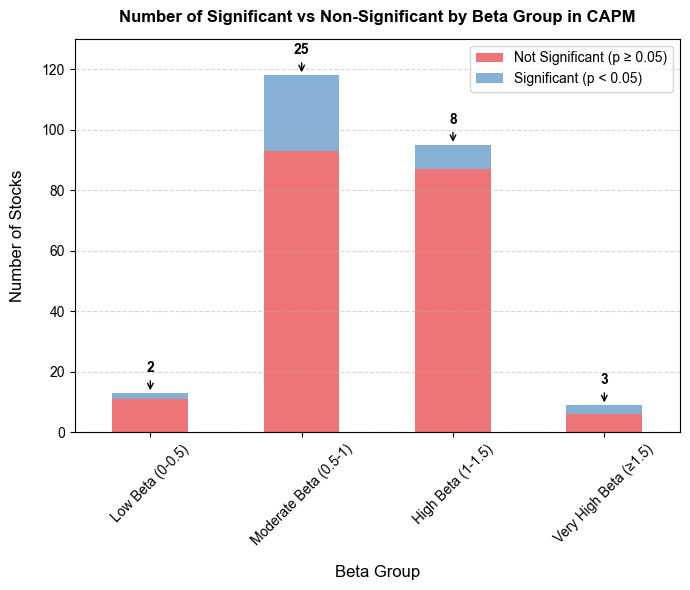

In [138]:
# 计算每个组别中显著偏离的股票数量
threshold = 0.05
stock_df['Significant'] = stock_df['p-value'] < threshold
summary = stock_df.groupby(['Beta Group', 'Significant']).size().unstack()

# 绘图
# ax = summary.plot(kind='bar', stacked=True, color=['#FFC107', '#03A9F4'], figsize=(12, 8))
ax = summary.plot(kind='bar', stacked=True, color=[color_map(0), color_map(1)], alpha=0.6, figsize=(7, 6))

# 标注箭头和数量
for i, (_, row) in enumerate(summary.iterrows()):
    num_significant = row[True]
    ax.annotate(f'{int(num_significant)}', 
                xy=(i, row[True] + row[False]), 
                xytext=(0, 15), 
                textcoords='offset points', 
                ha='center', 
                fontweight='bold',
                arrowprops=dict(arrowstyle='->', color='black'))

# 图表美化
plt.title('Number of Significant vs Non-Significant by Beta Group in CAPM', pad=12, fontproperties=bold_font)
plt.xlabel('Beta Group', labelpad=12, fontproperties=regular_font)
plt.xticks(rotation=45)
plt.ylabel('Number of Stocks', labelpad=12, fontproperties=regular_font)
plt.ylim(0, 130)
plt.legend(['Not Significant (p ≥ 0.05)', 'Significant (p < 0.05)'], prop=legend_font)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [83]:
# 筛选 Moderate Beta (0.5-1) 组的显著股票
moderate_beta_stocks = stock_df[(stock_df['Beta Group'] == 'Moderate Beta (0.5-1)') & 
                                (stock_df['Significant'] == True)]

# 打印显著股票的列表
#print("Significant Stocks in Moderate Beta (0.5-1) Group:")
#print(moderate_beta_stocks[['Stock', 'Alpha', 'p-value']])

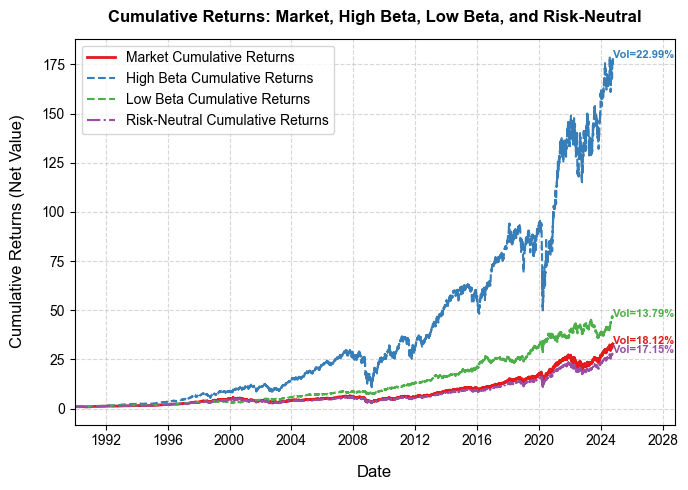

In [108]:
from datetime import datetime

# 模拟市场和股票收益数据
r_market = data_frame['r_market'] / 100 # 市场组合收益
# r_market = r_market / 100.0

# Beta 分组
# high_beta_stocks = beta_df[(beta_df['Beta'] >= 1.5)]['Stock']
high_beta_stocks = beta_df[(beta_df['Beta'] >= 1) & (beta_df['Beta'] < 1.5)]['Stock']
low_beta_stocks = beta_df[(beta_df['Beta'] >= 0) & (beta_df['Beta'] < 0.5)]['Stock']

# 提取股票收益
high_beta_returns = data_frame[high_beta_stocks].mean(axis=1) / 100 # 高 Beta 股票平均收益
low_beta_returns = data_frame[low_beta_stocks].mean(axis=1)   / 100# 低 Beta 股票平均收益

# 风险中性组合收益
avg_beta = beta_df['Beta'].mean()  # 平均 Beta
risk_neutral_returns = avg_beta * r_market  # 风险中性组合收益
risk_neutral_returns = risk_neutral_returns

# 累积净值计算函数（逐时间点递推）
# 累积收益（净值）计算
market_cum_returns = (1 + r_market).cumprod()  # 市场组合累积收益
high_beta_cum_returns = (1 + high_beta_returns).cumprod()  # 高 Beta 累积收益
low_beta_cum_returns = (1 + low_beta_returns).cumprod()  # 低 Beta 累积收益
risk_neutral_cum_returns = (1 + risk_neutral_returns).cumprod()  # 风险中性组合累积收益

# 波动率计算
annual_factor = np.sqrt(252)  # 年化因子
market_volatility = r_market.std() * annual_factor
high_beta_volatility = high_beta_returns.std() * annual_factor
low_beta_volatility = low_beta_returns.std() * annual_factor
risk_neutral_volatility = risk_neutral_returns.std() * annual_factor

# 可视化累积收益
plt.figure(figsize=(7, 5))

# 绘制累积收益曲线
temp_df = df.copy()
temp_df = df.iloc[1:, :]
# blue, orange, green, red
plt.plot(temp_df['date'], market_cum_returns, label='Market Cumulative Returns', color=color_map(0), linewidth=2)
plt.plot(temp_df['date'], high_beta_cum_returns, label='High Beta Cumulative Returns', color=color_map(1), linestyle='--')
plt.plot(temp_df['date'], low_beta_cum_returns, label='Low Beta Cumulative Returns', color=color_map(2), linestyle='--')
plt.plot(temp_df['date'], risk_neutral_cum_returns, label='Risk-Neutral Cumulative Returns', color=color_map(3), linestyle='-.')

# 添加波动率标注
plt.text(temp_df['date'].iloc[-1], market_cum_returns.iloc[-1], f'Vol={market_volatility:.2%}', color=color_map(0), fontsize=8, fontweight='bold')
plt.text(temp_df['date'].iloc[-1], high_beta_cum_returns.iloc[-1], f'Vol={high_beta_volatility:.2%}', color=color_map(1), fontsize=8, fontweight='bold')
plt.text(temp_df['date'].iloc[-1], low_beta_cum_returns.iloc[-1], f'Vol={low_beta_volatility:.2%}', color=color_map(2), fontsize=8, fontweight='bold')
plt.text(temp_df['date'].iloc[-1], risk_neutral_cum_returns.iloc[-1], f'Vol={risk_neutral_volatility:.2%}', color=color_map(3), fontsize=8, fontweight='bold')

# 图表美化
plt.title('Cumulative Returns: Market, High Beta, Low Beta, and Risk-Neutral', pad=12, fontproperties=bold_font )
plt.xlabel('Date', labelpad=12, fontproperties=regular_font)
plt.xlim(temp_df['date'].iloc[0], temp_df['date'].iloc[-1]+pd.DateOffset(months=48))
plt.ylabel('Cumulative Returns (Net Value)', labelpad=12, fontproperties=regular_font)
plt.legend(prop=legend_font)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


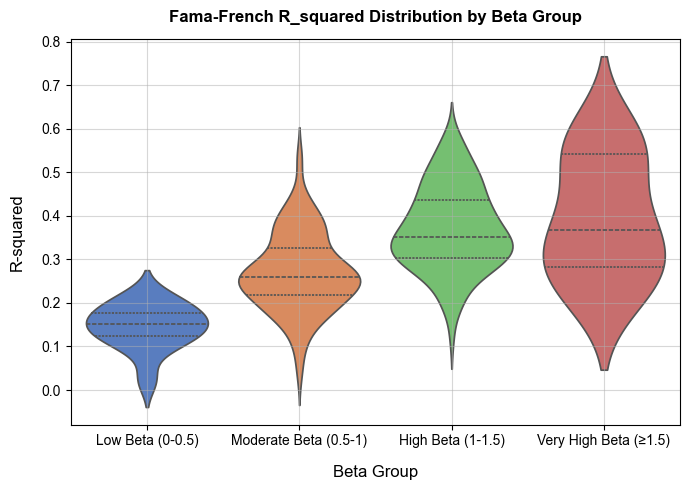

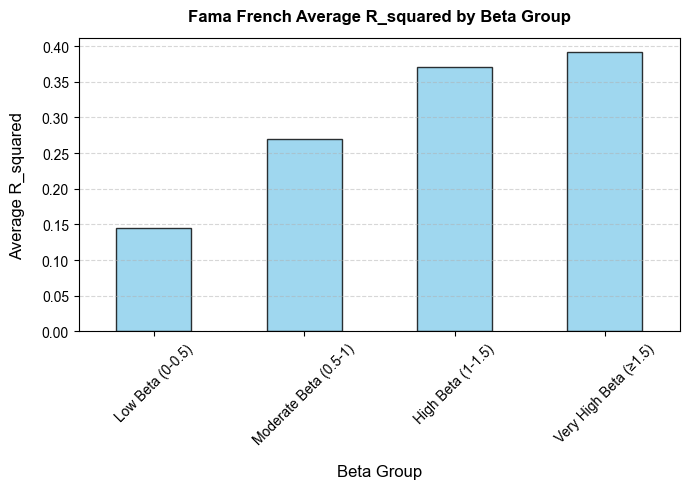

In [115]:
# 假设数据已经加载到 df 中
r_market = data_frame['r_market']                     # 市场组合收益
r_f = data_frame['rfr']                               # 无风险利率
r_smb = data_frame['smb']                             # SMB 因子
r_hml = data_frame['hml']                             # HML 因子

# 提取从第 5 列开始的所有股票列
stock_columns = data_frame.columns[5:]                # 假设从第 5 列开始为股票数据

# 初始化存储结果
fama_french_results = {
    'Stock': [], 'Beta_Market': [], 'Beta_SMB': [], 'Beta_HML': [], 'Alpha': [], 'R_squared': []
}

# 超额收益
excess_market_return = r_market - r_f         # 市场超额收益
factors = pd.DataFrame({'R_market': excess_market_return,
                        'SMB': r_smb,
                        'HML': r_hml})  # 构建 Fama-French 因子 DataFrame

# 按股票逐个回归
for stock in stock_columns:
    # 计算股票收益率
    r_stock = data_frame[stock]
    excess_stock_return = (r_stock - r_f)  # 计算股票的超额收益

    # 进行回归分析
    X = sm.add_constant(factors)               # 添加常数项到因子数据
    Y = excess_stock_return
    model = sm.OLS(Y, X).fit()                 # 进行 OLS 回归
    
    # 提取回归结果
    alpha = model.params['const']              # 截距
    beta_market = model.params['R_market']     # 市场因子 Beta
    beta_smb = model.params['SMB']             # SMB 因子 Beta
    beta_hml = model.params['HML']             # HML 因子 Beta
    r_squared = model.rsquared                 # R^2 值

    # 存储结果
    fama_french_results['Stock'].append(stock)
    fama_french_results['Beta_Market'].append(beta_market)
    fama_french_results['Beta_SMB'].append(beta_smb)
    fama_french_results['Beta_HML'].append(beta_hml)
    fama_french_results['Alpha'].append(alpha)
    fama_french_results['R_squared'].append(r_squared)

# 转换结果为 DataFrame
fama_french_df = pd.DataFrame(fama_french_results)

# 按 Beta_Market 分组
def classify_beta(beta):
    if 0 <= beta < 0.5:
        return 'Low Beta (0-0.5)'
    elif 0.5 <= beta < 1:
        return 'Moderate Beta (0.5-1)'
    elif 1 <= beta < 1.5:
        return 'High Beta (1-1.5)'
    else:
        return 'Very High Beta (≥1.5)'

fama_french_df['Beta_Group'] = fama_french_df['Beta_Market'].apply(classify_beta)

# 指定 Beta 分组顺序
beta_categories = ['Low Beta (0-0.5)', 'Moderate Beta (0.5-1)', 
                   'High Beta (1-1.5)', 'Very High Beta (≥1.5)']
fama_french_df['Beta_Group'] = pd.Categorical(fama_french_df['Beta_Group'], categories=beta_categories, ordered=True)

r_squared_means = fama_french_df.groupby('Beta_Group')['R_squared'].mean()

# 可视化 R_squared 的分布
plt.figure(figsize=(7, 5))
sns.violinplot(x='Beta_Group', y='R_squared', data=fama_french_df, palette='muted', inner='quartile')
plt.title('Fama-French R_squared Distribution by Beta Group', pad=12, fontproperties=bold_font )
plt.xlabel('Beta Group', labelpad=12, fontproperties=regular_font)
plt.ylabel('R-squared', labelpad=12, fontproperties=regular_font)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# 可视化：条形图展示 R_squared 平均值
plt.figure(figsize=(7, 5))
r_squared_means.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Fama French Average R_squared by Beta Group', pad=12, fontproperties=bold_font )
plt.xlabel('Beta Group', labelpad=12, fontproperties=regular_font)
plt.xticks(rotation=45)
plt.ylabel('Average R_squared', labelpad=12, fontproperties=regular_font)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [334]:
stock_info_df = beta_df
stock_info_df

,Stock,Beta,R_squared,Beta Group
0,PG,0.551347,0.209493,Moderate Beta (0.5-1)
1,PGR,0.829165,0.272149,Moderate Beta (0.5-1)
2,PEG,0.589889,0.222484,Moderate Beta (0.5-1)
3,PSA,0.736473,0.231674,Moderate Beta (0.5-1)
4,PHM,1.333213,0.300416,High Beta (1-1.5)
...,...,...,...,...
230,PCG,0.633872,0.078624,Moderate Beta (0.5-1)
231,PNW,0.526132,0.163740,Moderate Beta (0.5-1)
232,PNC,1.192705,0.394543,High Beta (1-1.5)
233,PPG,0.972612,0.416252,Moderate Beta (0.5-1)


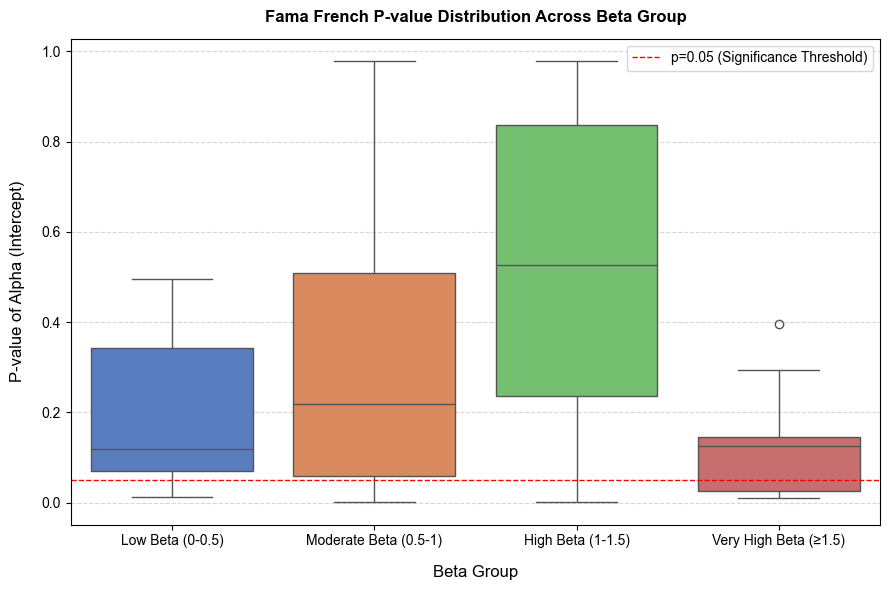

In [119]:
# 模拟数据
r_market = data_frame['r_market']              # 市场组合收益（小数）
r_f = data_frame['rfr']                          # 无风险收益率（小数）
r_smb = data_frame['smb']                        # SMB（小数）
r_hml = data_frame['hml']                        # HML（小数）

# 提取股票收益列
stock_columns = data_frame.columns[5:]                   # 股票收益列 (假设从第 5 列起)

# 初始化存储结果
stock_results = {'Beta Group': [], 'Stock': [], 'Alpha': [], 'p-value': []}

# 定义 Beta 分组类别
beta_categories = ['Low Beta (0-0.5)', 'Moderate Beta (0.5-1)', 
                   'High Beta (1-1.5)', 'Very High Beta (≥1.5)']

# 按 Beta 分组，逐股票回归
for beta_group in combined_df['Beta Group'].unique():
    # 筛选当前 Beta 分组的股票
    stocks_in_group = combined_df[combined_df['Beta Group'] == beta_group]['Stock']
    
    for stock in stocks_in_group:
        r_stock = data_frame[stock] # 股票收益率
        excess_stock_return = (r_stock - r_f) # 超额收益率
        
        # 检查有效样本量
        if len(excess_stock_return) < 10:
            continue  # 样本量不足，跳过
        
        # 构建 Fama-French 因子矩阵
        factors = pd.DataFrame({
            'R_market': r_market - r_f,  # 市场超额收益
            'SMB': r_smb,
            'HML': r_hml
        })

        # 确保因子和股票超额收益对齐
        factors = factors.loc[excess_stock_return.index]
        X = sm.add_constant(factors)  # 添加截距项
        Y = excess_stock_return      # 因变量

        # 三因子回归
        model = sm.OLS(Y, X).fit()
        
        # 提取回归结果
        alpha = float(model.params['const'])      # 截距 (Alpha)
        p_value = float(model.pvalues['const'])  # 截距的 p-value

        # 确保合法性
        if p_value <= 0 or p_value >= 1:
            continue  # 跳过非法 p 值

        # 存储信息
        stock_results['Beta Group'].append(beta_group)
        stock_results['Stock'].append(stock)
        stock_results['Alpha'].append(alpha)
        stock_results['p-value'].append(p_value)

# 转换为 DataFrame
stock_df = pd.DataFrame(stock_results)

# 去除 p-value 数据中的非法值
stock_df = stock_df.dropna()
stock_df = stock_df[(stock_df['p-value'] > 0) & (stock_df['p-value'] < 1)]

# 确保 Beta 分组按指定顺序排列
stock_df['Beta Group'] = pd.Categorical(stock_df['Beta Group'], categories=beta_categories, ordered=True)

# 绘制箱线图
plt.figure(figsize=(9, 6))
sns.boxplot(x='Beta Group', y='p-value', data=stock_df, palette='muted')

# 图表美化
plt.title('Fama French P-value Distribution Across Beta Group', pad=12, fontproperties=bold_font )
plt.xlabel('Beta Group', labelpad=12, fontproperties=regular_font)
plt.ylabel('P-value of Alpha (Intercept)', labelpad=12, fontproperties=regular_font)
plt.axhline(0.05, color='red', linestyle='--', linewidth=1, label='p=0.05 (Significance Threshold)')
plt.legend(prop=legend_font)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

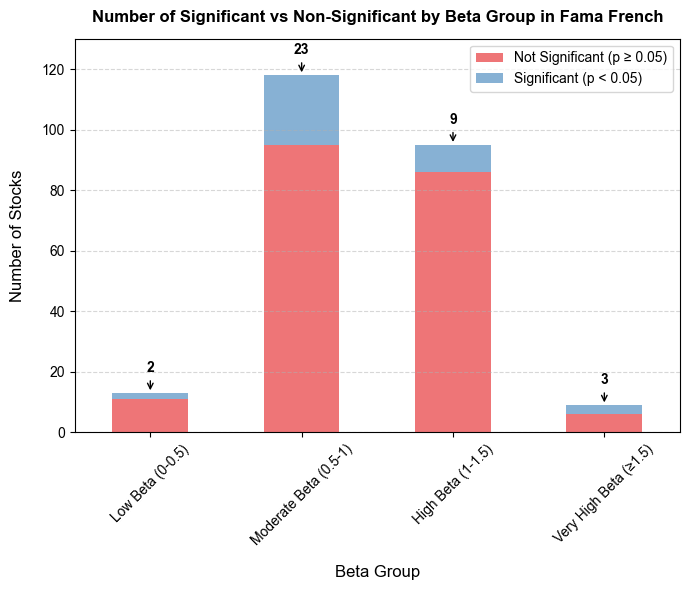

In [125]:
# 计算每个组别中显著偏离的股票数量
threshold = 0.05
stock_df['Significant'] = stock_df['p-value'] < threshold
summary = stock_df.groupby(['Beta Group', 'Significant']).size().unstack()

# 绘图
ax = summary.plot(kind='bar', stacked=True, color=[color_map(0), color_map(1)], alpha=0.6, figsize=(7, 6))

# 标注箭头和数量
for i, (_, row) in enumerate(summary.iterrows()):
    num_significant = row[True]
    ax.annotate(f'{int(num_significant)}', 
                xy=(i, row[True] + row[False]), 
                xytext=(0, 15), 
                textcoords='offset points', 
                ha='center', 
                fontweight='bold',
                arrowprops=dict(arrowstyle='->', color='black'))

# 图表美化
plt.title('Number of Significant vs Non-Significant by Beta Group in Fama French', pad=12, fontproperties=bold_font )
plt.xlabel('Beta Group', labelpad=12, fontproperties=regular_font)
plt.ylabel('Number of Stocks', labelpad=12, fontproperties=regular_font)
plt.ylim(0, 130)
plt.xticks(rotation=45)
plt.legend(['Not Significant (p ≥ 0.05)', 'Significant (p < 0.05)'], prop=legend_font)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [124]:
# 筛选 Moderate Beta (0.5-1) 组的显著股票
moderate_beta_stocks2 = stock_df[(stock_df['Beta Group'] == 'Moderate Beta (0.5-1)') & 
                                (stock_df['Significant'] == True)]

# 打印显著股票的列表
#print("Significant Stocks in Moderate Beta (0.5-1) Group:")
#print(moderate_beta_stocks2[['Stock', 'Alpha', 'p-value']])

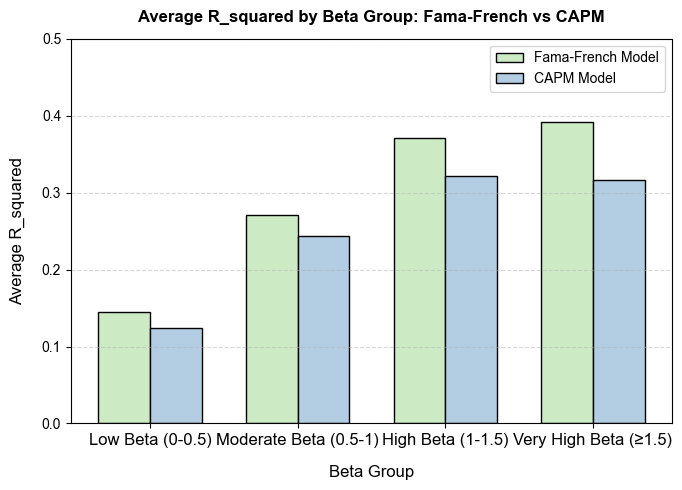

In [128]:
x = np.arange(len(r_squared_means.index))  # X轴位置（类别索引）
bar_width = 0.35                           # 条形宽度

plt.figure(figsize=(7, 5))
# Fama-French 平均 R_squared 条形
plt.bar(x - bar_width / 2, r_squared_means.values, width=bar_width, label="Fama-French Model", color=color_map_alpha(2), edgecolor="black")
# CAPM 平均 R_squared 条形
plt.bar(x + bar_width / 2, r_squared_means_CAPM.values, width=bar_width, label="CAPM Model", color=color_map_alpha(1), edgecolor="black")

# 图表美化
plt.title("Average R_squared by Beta Group: Fama-French vs CAPM", pad=12, fontproperties=bold_font )
plt.xlabel("Beta Group", labelpad=12, fontproperties=regular_font)
plt.ylabel("Average R_squared", labelpad=12, fontproperties=regular_font)
plt.xticks(x, r_squared_means.index, fontsize=12)  # 设置 X 轴标签
plt.ylim(0, 0.5)  # 设置 Y 轴范围
plt.legend(prop=legend_font)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


ECL Regression:
                            OLS Regression Results                            
Dep. Variable:                    ECL   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     1653.
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:28:40   Log-Likelihood:                -14425.
No. Observations:                8752   AIC:                         2.886e+04
Df Residuals:                    8748   BIC:                         2.889e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0166      0.013   

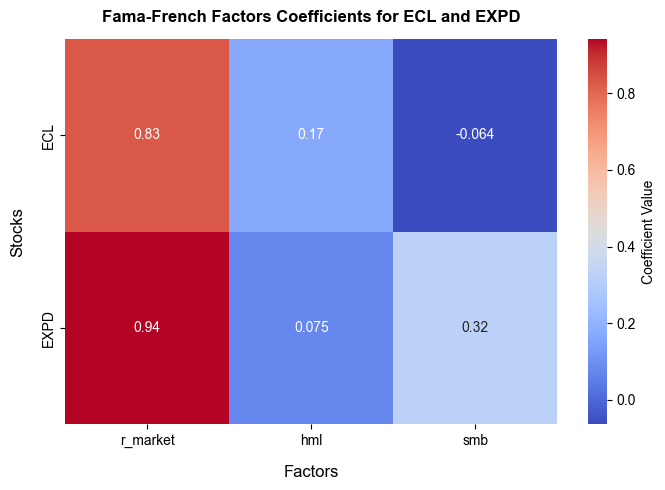

In [131]:
# 比较下两个特殊股票的风险暴露情况

factors = data_frame[['r_market', 'hml', 'smb']]
stocks = data_frame[['ECL', 'EXPD']]

# 计算超额收益
r_f = data_frame['rfr']
excess_stocks = stocks.sub(r_f, axis=0)
excess_market = data_frame['r_market'].sub(r_f, axis=0)

# 回归分析
results = {}
for stock in excess_stocks.columns:
    Y = excess_stocks[stock]
    X = sm.add_constant(factors)
    model = sm.OLS(Y, X).fit()
    results[stock] = model

# 打印回归结果
for stock, model in results.items():
    print(f'\n{stock} Regression:')
    print(model.summary())

# 绘制回归系数的可视化
coefficients = pd.DataFrame(
    {stock: model.params for stock, model in results.items()}).T[['r_market', 'hml', 'smb']]

plt.figure(figsize=(7, 5))
sns.heatmap(coefficients, annot=True, cmap='coolwarm', cbar_kws={'label': 'Coefficient Value'})
plt.title('Fama-French Factors Coefficients for ECL and EXPD', pad=12, fontproperties=bold_font)
plt.xlabel('Factors', labelpad=12, fontproperties=regular_font)
plt.ylabel('Stocks', labelpad=12, fontproperties=regular_font)
plt.tight_layout()

plt.show()
